In [108]:
#Import useful modules
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras import models
from keras import layers

In [119]:
#Set directory and import the Letters data
os.chdir('D:\MSc2\Deep Learning Keras\Task1')
data = pd.read_csv('Mushroom.txt',header=None)

#Randomly shuffle the data
data = data.iloc[np.random.permutation(data.shape[0]),].reset_index(drop=True)

In [120]:
#data.head() #First column is the label (binary)
#data.shape #(8124, 23)
#data.describe()
#data.info() #object
#data.columns.values #column names

In [121]:
##Section 1: Data Preprocessing
#Rename the columns 
data.columns = ["Label"] + ["Feature" + str(num1) for num1 in range(1,23)]

#Remove feature 11 and Rename the columns 
data = data.drop(['Feature11'], axis=1) #Constant values
data.columns = ["Label"] + ["Feature" + str(num1) for num1 in range(1,22)]

#Create features and labels
y = data['Label'].astype("category") #binary labels - pandas series (type categoy)
x = pd.get_dummies(data.iloc[:,1:]) #one-hot-encoding of features - pandas dataframe (type uint8(112))
d = dict(zip(y.unique(), reversed(range(0,2)))) #{'p': 1, 'e': 0}
y = y.map(d, na_action='ignore') #map the labels of Y: Poissonous - 1, Others - 0

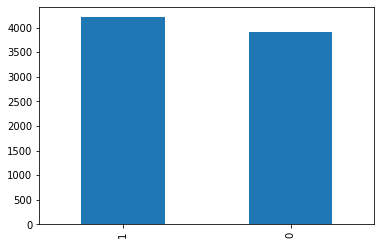

In [122]:
##Section 2. Exploratory Data Analysis
#1) Plot the class label distribution - balanced classes
label_dist = y.value_counts().sort_index() #create a table of counts
label_dist.plot.bar()

In [123]:
##Section 3. Prepare data for modelling
#Split the dataset into training (70%) and testing (30%) dataset
n = data.shape[0]
k = 0.70
q = int(round(n*k))
train_x = x.iloc[:q,:] 
train_y = y[:q]
test_x = x.iloc[q:,:] 
test_y = y[q:]

#Convert to numpy arrays of X and Y
train_x = np.asarray(train_x).astype('float32')
train_y = np.asarray(train_y).astype('float32')
test_x = np.asarray(test_x).astype('float32')
test_y = np.asarray(test_y).astype('float32')

#type(train_x), type(train_y), type(test_x), type(test_y) - (numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)
#train_x.shape, train_y.shape, test_x.shape, test_y.shape - ((5687, 112), (5687,), (2437, 112), (2437,))

In [128]:
##Section 4. Model Building
#1)Architecture of the model
d = train_x.shape[1]
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(d,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) #Optimizer, Loss function, Metrics

#2)Train the model 
q = int(0.3*train_x.shape[0]) #70%-30% train vs dev 
x_val = train_x[:q] #train vs dev sets
partial_x_train = train_x[q:]
y_val = train_y[:q]
partial_y_train = train_y[q:]

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=128,validation_data=(x_val,y_val),
                   verbose=0) 
history_dict = history.history #History object
#history_dict.keys() #[u'acc', u'loss', u'val_acc', u'val_loss']

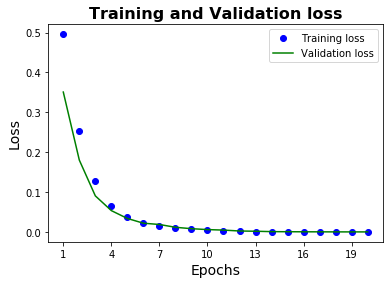

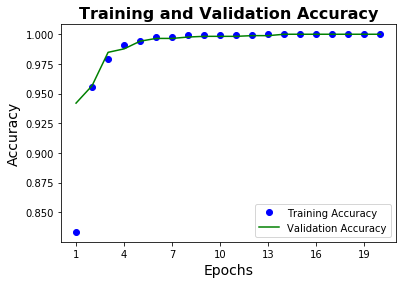

In [129]:
#3)Tuning - Plot loss and accuracy (training vs dev)
epochs = range(1,len(loss_values)+1)
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.plot(epochs,loss_values, 'bo', label='Training loss')
plt.plot(epochs,val_loss_values, 'g', label='Validation loss')
plt.xticks(range(1, 20,3))
plt.title('Training and Validation loss', fontweight = 'bold',fontsize = 16)
plt.xlabel('Epochs',fontsize = 14)
plt.ylabel('Loss',fontsize = 14)
plt.legend()
plt.show()

acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs,acc, 'bo', label='Training Accuracy')
plt.plot(epochs,val_acc, 'g', label='Validation Accuracy')
plt.xticks(range(1, 20,3))
plt.title('Training and Validation Accuracy', fontweight = 'bold',fontsize = 16)
plt.xlabel('Epochs',fontsize = 14)
plt.ylabel('Accuracy',fontsize = 14)
plt.legend()
plt.show()

In [130]:
#4)Finalize - retraining the model using whole training set
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(d,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_x, train_y, epochs=10,batch_size=128,verbose=0) 

In [131]:
#5)Evaluate on the test set
model.evaluate(test_x,test_y) #[loss, accuracy] = [0.0002744371448270064, 1.0]

2437/2437 [==============================] - 0s 116us/step


[0.00027378587968142836, 1.0]

(array([1185.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1252.]),
 array([4.48152150e-07, 1.00000404e-01, 2.00000361e-01, 3.00000310e-01,
        4.00000274e-01, 5.00000238e-01, 6.00000203e-01, 7.00000107e-01,
        8.00000072e-01, 9.00000036e-01, 1.00000000e+00], dtype=float32),
 <a list of 10 Patch objects>)

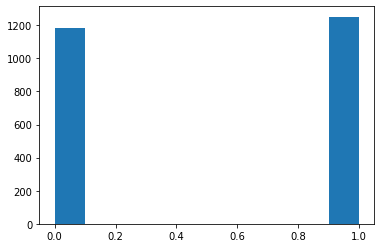

In [132]:
#6)Closer look at the test set performance
predictions = model.predict(test_x) #see the soft probability of the predicted data
plt.hist(predictions)